In [1]:
import numpy as np
from skimage import io
from matplotlib import pyplot as plt

In [2]:
image_array = []
for i in range(415):
    image = io.imread("/home/jimlin7777/ML2017/hw6/data/PCA/Aberdeen/{}.jpg".format(i))
    image_array.append(image)
image_array = np.stack(image_array)
image_array = image_array.astype(float)

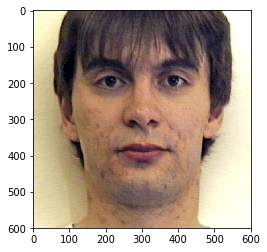

In [66]:
image_array.shape
plt.imshow(image_array[270].astype(np.uint8))

[[[ 230.58072289  229.6939759   224.04578313]
  [ 232.65542169  231.72048193  225.99277108]
  [ 234.42650602  233.45060241  227.69156627]
  ..., 
  [ 190.48433735  189.74457831  188.06987952]
  [ 186.12289157  185.59036145  184.2746988 ]
  [   1.19759036    0.86987952    0.77831325]]

 [[ 230.44096386  229.50843373  223.82168675]
  [ 232.54457831  231.59759036  225.85783133]
  [ 234.29879518  233.32289157  227.56144578]
  ..., 
  [ 190.3373494   189.60722892  187.92771084]
  [ 186.07710843  185.54216867  184.21927711]
  [   1.14216867    0.82650602    0.76385542]]

 [[ 230.2313253   229.29638554  223.54457831]
  [ 232.40722892  231.45783133  225.66987952]
  [ 234.21927711  233.22650602  227.40722892]
  ..., 
  [ 190.20481928  189.46506024  187.76385542]
  [ 186.01686747  185.46987952  184.15421687]
  [   1.15180723    0.82409639    0.74457831]]

 ..., 
 [[ 133.03614458  127.38554217  116.40240964]
  [ 133.35180723  127.67710843  116.61445783]
  [ 134.45060241  128.71084337  117.6626506

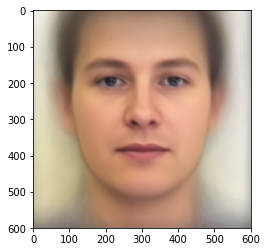

In [57]:
mean = np.mean(image_array , axis=0)
plt.imshow(mean.astype(np.uint8))
print(mean)
mean = mean.reshape(-1)

print(mean.shape)

In [5]:
A = np.zeros((600 * 600 * 3, 415))
total = 0.
for index, image in enumerate(image_array):
    A[:, index] = image.reshape(-1) - mean
    


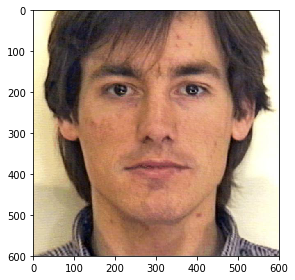

In [6]:
io.imshow((A[:, 0] + mean).reshape(600, 600, 3).astype(np.uint8))


In [42]:
U, s, V = np.linalg.svd(A, full_matrices=False)

In [8]:
U.shape

(1080000, 415)

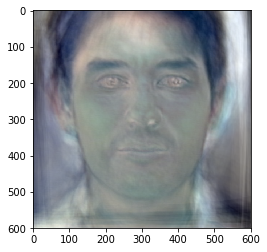

In [43]:


eigen_face = U[:, 9].copy()
eigen_face = -1*eigen_face.reshape(600, 600, 3)
eigen_face -= np.min(eigen_face)
eigen_face /= np.max(eigen_face)
eigen_face = (eigen_face * 255).astype(np.uint8)
plt.figure()
plt.imshow(eigen_face)



In [34]:
# implement by linalg
L = A.T.dot(A)
w, v = np.linalg.eig(L)

In [35]:
arg_index = np.argsort(w)
top_k_index = arg_index[-20:]

In [45]:
A.dot(v[:, 0])

array([ 61.68266391,  49.48577899, -32.29446365, ...,  11.69550905,
        -0.80362492,  -1.59175167])

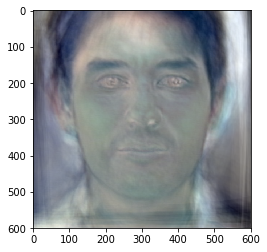

In [38]:
eigen_face2 = A.dot(v[:, 9])
eigen_face2 = -1*eigen_face2.reshape(600, 600, 3)
eigen_face2 -= np.min(eigen_face2)
eigen_face2 /= np.max(eigen_face2)
eigen_face2 = (eigen_face2 * 255).astype(np.uint8)
plt.figure()
plt.imshow(eigen_face2)

(1080000, 100)


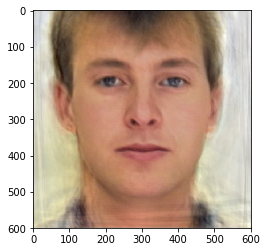

In [29]:
top_k = 100
first_k_U = U[:, :top_k].copy()
print(first_k_U.shape)
y_ = 0
index = 27
coefficient = A[:, index].dot(first_k_U)
y_ = np.sum(coefficient * first_k_U, axis=1)
y_ += mean
y_ = y_.reshape(600, 600, 3)
y_ -= np.min(y_)
y_ /= np.max(y_)
y_ = (y_ * 255).astype(np.uint8)
#io.imshow((A[:, index] + mean).reshape(600, 600, 3).astype(np.uint8))
plt.imshow(y_)

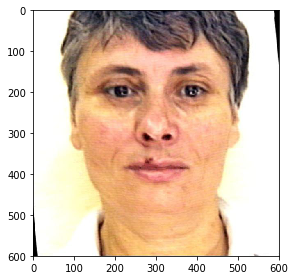

In [42]:
io.imshow((A[:, index] + mean).reshape(600, 600, 3).astype(np.uint8))

In [32]:
# lambda ratio
lambda_ = [s[i] for i in range(4)]
lambda_sum = np.sum(s)
lambda_ratio =list(map(lambda x: x / lambda_sum * 100, lambda_))

In [33]:
lambda_ratio

[4.1446248382629642, 2.9487322251120678, 2.387711293208413, 2.2078415569025407]